In [1]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
import tensorflow.keras.backend as k

In [4]:
from tensorflow.keras.models import Model

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Conv2D

In [7]:
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.layers import Flatten

In [9]:
from tensorflow.keras.layers import  MaxPooling2D

In [10]:
from tensorflow.keras.layers import Input

In [11]:
from tensorflow.keras.layers import Dropout

In [12]:
from tensorflow.keras.layers import LeakyReLU

In [13]:
from tensorflow.keras.layers import Activation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
import matplotlib.pyplot as plt

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 60, 60, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 308 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [23]:
img_dims = 150
epochs = 5
batch_size = 32

In [24]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/5
9/9 [==============================] - 80s 9s/step - loss: 3.4857 - accuracy: 0.2935 - val_loss: 1.0978 - val_accuracy: 0.3750
Epoch 2/5
9/9 [==============================] - 74s 8s/step - loss: 1.0997 - accuracy: 0.3152 - val_loss: 1.0976 - val_accuracy: 0.3281
Epoch 3/5
9/9 [==============================] - 73s 8s/step - loss: 1.0892 - accuracy: 0.4022 - val_loss: 1.0991 - val_accuracy: 0.3125
Epoch 4/5
9/9 [==============================] - 79s 9s/step - loss: 1.0727 - accuracy: 0.3889 - val_loss: 1.0832 - val_accuracy: 0.3594
Epoch 5/5
9/9 [==============================] - 76s 8s/step - loss: 1.0941 - accuracy: 0.3264 - val_loss: 1.0972 - val_accuracy: 0.3594


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

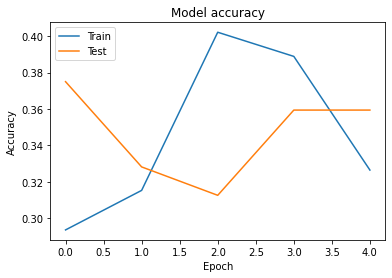

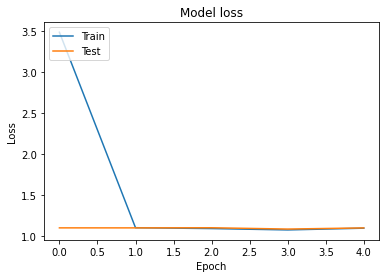

In [25]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()